Q1.Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.

Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [17]:
df = pd.read_excel('./ENB2012_data.xlsx')
df = df.rename(columns={'X1':'Relative_Compactness', 'X2':'Surface_Area', 'X3':'Wall_Area', 'X4':'Roof_Area', 'X5':'Overall_Height', 'X6':'Orientation', 'X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution', 'Y1':'heating_load', 'Y2':'cooling_load'})
nan_values = df.isna().sum() 
print(nan_values)
df

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
heating_load                 0
cooling_load                 0
dtype: int64


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [19]:
# no missing data values in dataframe

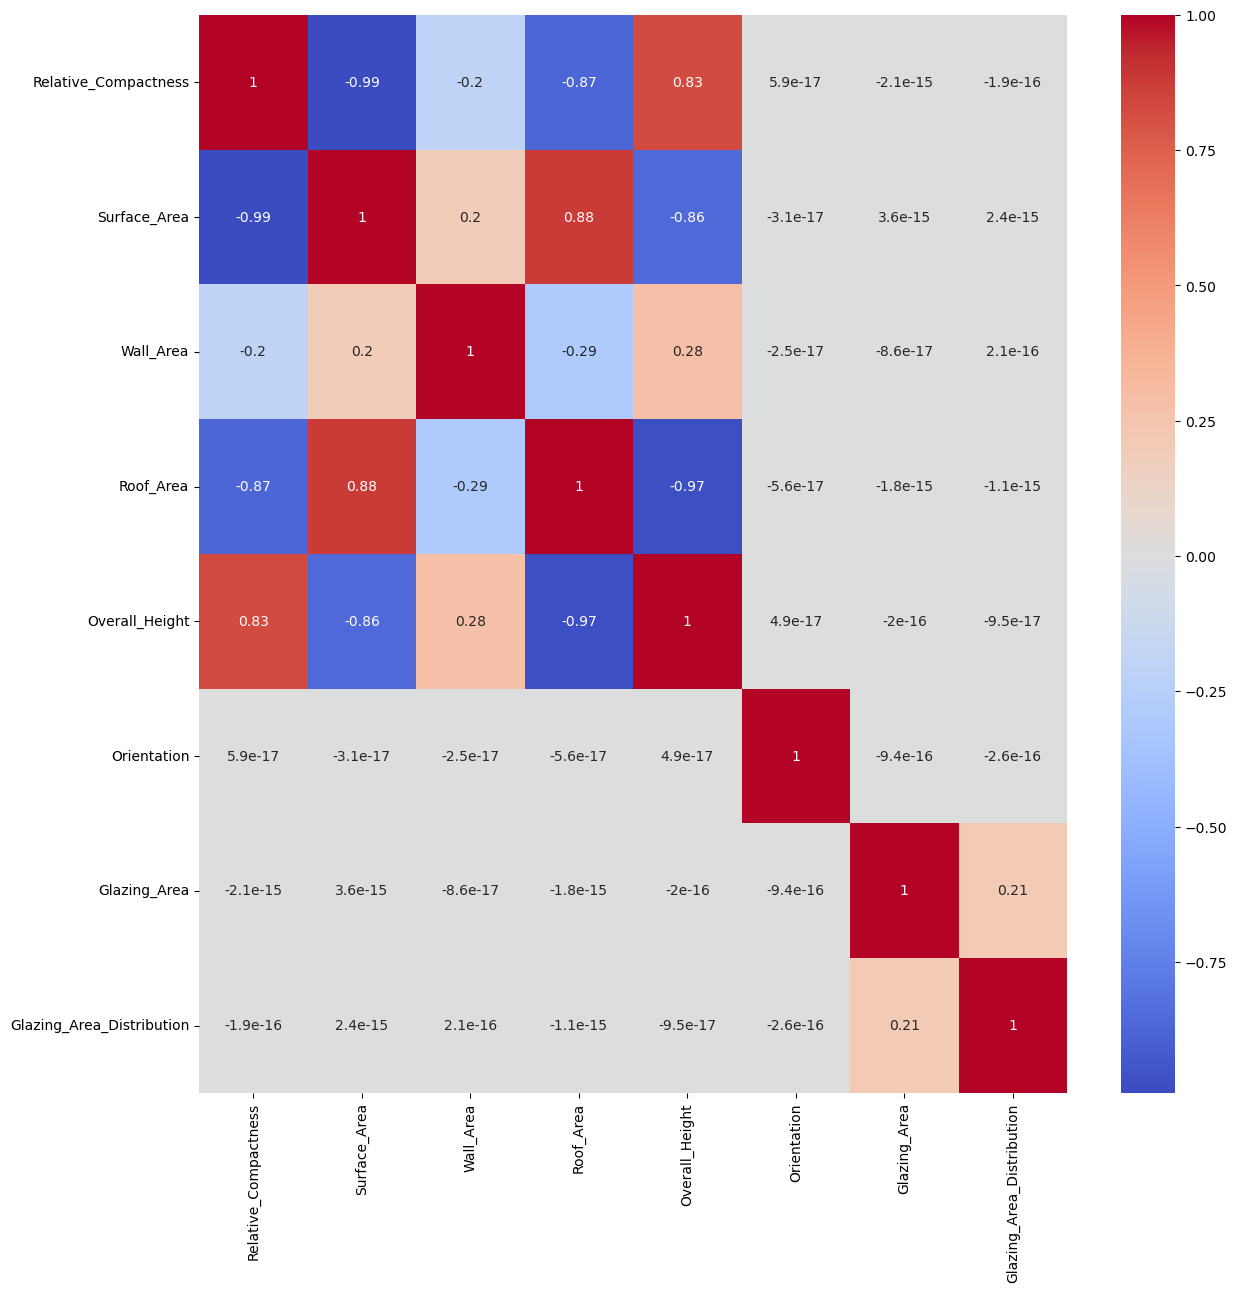

In [21]:
df_without_tar_values = df.drop(columns = ['cooling_load', 'heating_load'])
correlation_matrix = df_without_tar_values.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [23]:
#  let threshold for dropping the features  = 0.8
threshold = 0.8
high_correlation = np.where(np.abs(correlation_matrix) > threshold)
high_correlation = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_correlation) if x != y and x < y]
features_drop = set()
for feature1, feature2 in high_correlation:
    features_drop.add(feature2)
features_drop

df_reduced = df_without_tar_values.drop(columns = list(features_drop))
df_reduced

,Relative_Compactness,Wall_Area,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,294.0,2,0.0,0
1,0.98,294.0,3,0.0,0
2,0.98,294.0,4,0.0,0
3,0.98,294.0,5,0.0,0
4,0.90,318.5,2,0.0,0
...,...,...,...,...,...
763,0.64,343.0,5,0.4,5
764,0.62,367.5,2,0.4,5
765,0.62,367.5,3,0.4,5
766,0.62,367.5,4,0.4,5


In [25]:
Q1 = df_reduced.quantile(0.25) #25th percentile
Q3 = df_reduced.quantile(0.75) #75th percentile
IQR = Q3 - Q1 #interquatile range

outliers_in_df = ((df_reduced < (Q1 - 1.5 * IQR)) | (df_reduced > (Q3 + 1.5 * IQR)))
outlier_rows = df_reduced[outliers_in_df.any(axis=1)]
outlier_rows.describe()
# this implies no outlier is there with respect to any feature 

,Relative_Compactness,Wall_Area,Orientation,Glazing_Area,Glazing_Area_Distribution
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


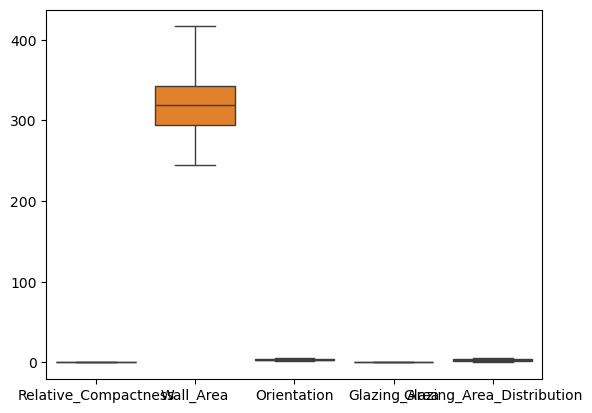

In [27]:
sns.boxplot(data = df_reduced)
plt.show()

In [29]:
# since there are no potential outliers then this implies there is no data value which is outside of the iqr in box plot as well

(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [32]:
df_reduced['heating_load'] = df['heating_load']

X = df_reduced.drop(columns = ['heating_load'])
y = df_reduced['heating_load']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

X_test_reset = X_test.reset_index(drop = True)
y_test_reset = y_test.reset_index(drop = True)

X_test_reset.insert(0, 'intercept', 1)

In [34]:
#end

(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [37]:
# since the Wall area  values are varying at a very large scale so we will apply feature scaling to Wall_area
def z_score_normalized(x):
    x = (x - x.mean())/x.std()
    return x
    
# feature scaling ( Wall_area )
X_train_normalized = X_train.copy()
X_train_normalized['Wall_Area'] = z_score_normalized(X_train['Wall_Area']).copy()

X_train_reset = X_train_normalized.reset_index(drop = True)
X_train_reset.insert(0, 'intercept', 1)

y_train_reset = y_train.reset_index(drop = True)

X_train_reset.describe()

,intercept,Relative_Compactness,Wall_Area,Orientation,Glazing_Area,Glazing_Area_Distribution
count,614.0,614.000000,6.140000e+02,614.000000,614.000000,614.000000
mean,1.0,0.763290,5.670455e-16,3.526059,0.235342,2.846906
std,0.0,0.105876,1.000000e+00,1.118642,0.133488,1.547302
min,1.0,0.620000,-1.699910e+00,2.000000,0.000000,0.000000
25%,1.0,0.667500,-5.647879e-01,3.000000,0.100000,2.000000
50%,1.0,0.740000,2.773099e-03,4.000000,0.250000,3.000000
75%,1.0,0.820000,5.703341e-01,5.000000,0.400000,4.000000
max,1.0,0.980000,2.273017e+00,5.000000,0.400000,5.000000


In [39]:
m = 614 
arr_w = np.zeros(6)
named_cols = ['intercept', 'Relative_Compactness', 'Wall_Area', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']
w = pd.DataFrame(arr_w.reshape(1, -1), columns = named_cols)
w

,intercept,Relative_Compactness,Wall_Area,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
def gradient(col_name):
    gradient = 0
    predictions = np.dot(X_train_reset.values, w.values.flatten().T)  
    errors = predictions - y_train_reset.values                      
    gradient_value = np.dot(errors, X_train_reset[col_name].values) / m
    return gradient_value


def gradient_descent(learning_rate = 0.001):
    error = 10**(-6)
    iteration = 0
    max_iterations = 500000
    
    while True:
        iteration += 1
        w_prev = w.copy()
        for col_name in X_train_reset.columns:
            grad = gradient(col_name)
            w[col_name] -= learning_rate * grad

        diff = max(abs(w.iloc[0, w.columns.get_loc(col_name)] - w_prev.iloc[0, w_prev.columns.get_loc(col_name)]) 
                   for col_name in X_train_reset.columns)
        if diff < error or iteration >= max_iterations:
            break
    return w

optimized_weights = gradient_descent()
optimized_weights


,intercept,Relative_Compactness,Wall_Area,Orientation,Glazing_Area,Glazing_Area_Distribution
0,-34.93022,68.914283,6.03639,-0.142437,19.156336,0.185755


In [44]:
X_test_reset['Wall_Area'] = z_score_normalized(X_test_reset['Wall_Area']).copy()

y_predictions = np.dot(X_test_reset.values, optimized_weights.values.flatten().T)
y_predictions_series = pd.Series(y_predictions)

y_predictions_series.describe()

count    154.000000
mean      22.401811
std        9.038057
min        5.693772
25%       14.665767
50%       22.886123
75%       30.244812
max       38.673937
dtype: float64

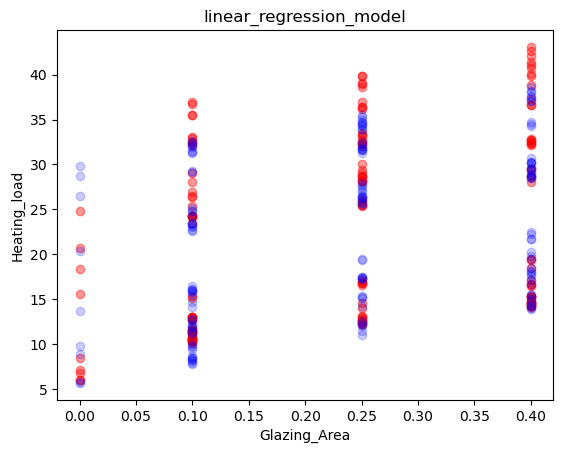

In [46]:

plt.scatter(X_test_reset['Glazing_Area'], y_test_reset, color = 'red', label = 'Data Points',alpha = 0.4)
plt.xlabel('Glazing_Area')
plt.ylabel('Heating_load')
plt.title('linear_regression_model')
plt.scatter(X_test_reset['Glazing_Area'], y_predictions_series, color = 'blue', label = 'regression_model', alpha = 0.2)
plt.show()

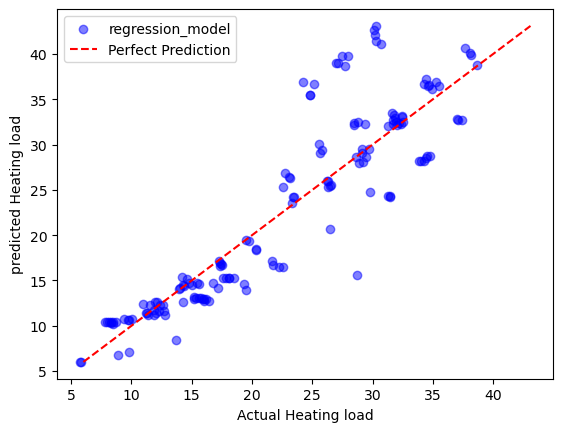

In [48]:
plt.scatter(y_predictions_series, y_test_reset, color = 'blue', label = 'regression_model', alpha = 0.5)
plt.plot([min(y_test_reset), max(y_test_reset)], [min(y_test_reset), max(y_test_reset)], 'r--', label="Perfect Prediction")
plt.xlabel('Actual Heating load')
plt.ylabel('predicted Heating load')
plt.legend()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Intercept: -81.88940079402511
Coefficients: [71.28715385  0.14107632 -0.10687167 19.42616867  0.19627641]
Mean Squared Error: 20.395874948070784
R2 Score: 0.811924806494336


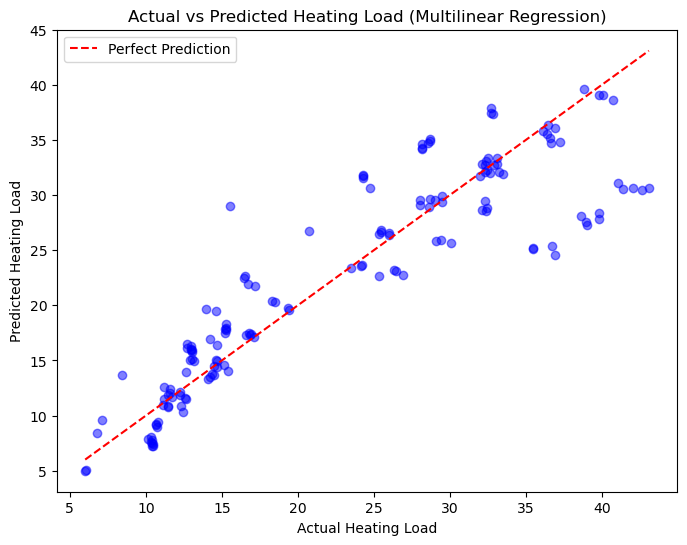

In [52]:
error_sk = mean_squared_error(y_pred, y_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load (Multilinear Regression)")
plt.legend()
plt.show()

In [54]:
# rige regression

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)
y_pred_series = pd.Series(y_pred)
# y_pred_series.describe()

error_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred_series)
print(error_ridge, r2_ridge)

20.395649239330282 0.8119268878080895


In [64]:
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_series = pd.Series(y_pred)
y_pred_series.describe()
error_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred_series)
r2_lasso

0.8118596617899523

(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [67]:
# r2_score
#manual model
r2_score_manual = r2_score(y_test_reset, y_predictions_series)
print('r2_score for the manual model', r2_score_manual)
# sklearn model
print('r2_score for the sklearn model', r2)
# ridge regression
print('r2_score for the ridge regression model', r2_ridge)
# lasso regression
print('r2_score for the lasso regression model', r2_lasso)

r2_score for the manual model 0.8100880953032107
r2_score for the sklearn model 0.811924806494336
r2_score for the ridge regression model 0.8119268878080895
r2_score for the lasso regression model 0.8118596617899523


In [69]:
#mean squared error
error_manual = mean_squared_error(y_predictions_series, y_test_reset)
print('error for manual model', error_manual)
# mse sklearn model
print('error for sklearn model is ', error_sk)
# ridge regression
print('error for the ridge regression model', error_ridge)
#lasso regression
print('error for the lasso regression model', error_lasso)

error for manual model 20.59505768488815
error for sklearn model is  20.395874948070784
error for the ridge regression model 20.395649239330282
error for the lasso regression model 20.40293958652401


In [71]:
# rmse
rmse_manual = np.sqrt(error_manual)
print('rmse error for manual model', rmse_manual)
#mse sklearn model
rmse_sk = np.sqrt(error_sk)
print('rmse error for sklearn model', rmse_sk)
#ridge
rmse_ridge = np.sqrt(error_ridge)
print('rmse error for ridge regression model', rmse_ridge)
#mse lasso
rmse_lasso = np.sqrt(error_lasso)
print('rmse error for sklearn model', rmse_lasso)

rmse error for manual model 4.538177793441785
rmse error for sklearn model 4.516179242243468
rmse error for ridge regression model 4.516154253270174
rmse error for sklearn model 4.516961322230245


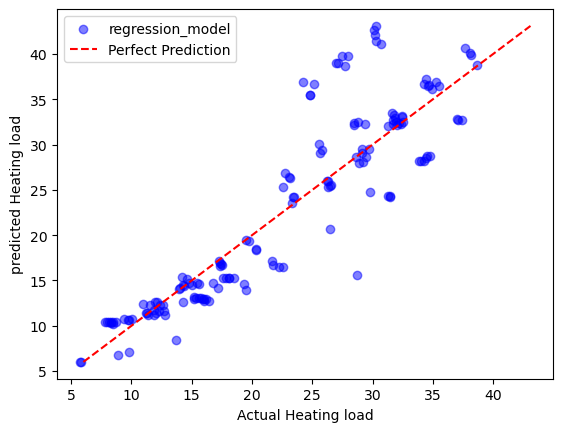

In [73]:
plt.scatter(y_predictions_series, y_test_reset, color = 'blue', label = 'regression_model', alpha = 0.5)
plt.plot([min(y_test_reset), max(y_test_reset)], [min(y_test_reset), max(y_test_reset)], 'r--', label="Perfect Prediction")
plt.xlabel('Actual Heating load')
plt.ylabel('predicted Heating load')
plt.legend()
plt.show()

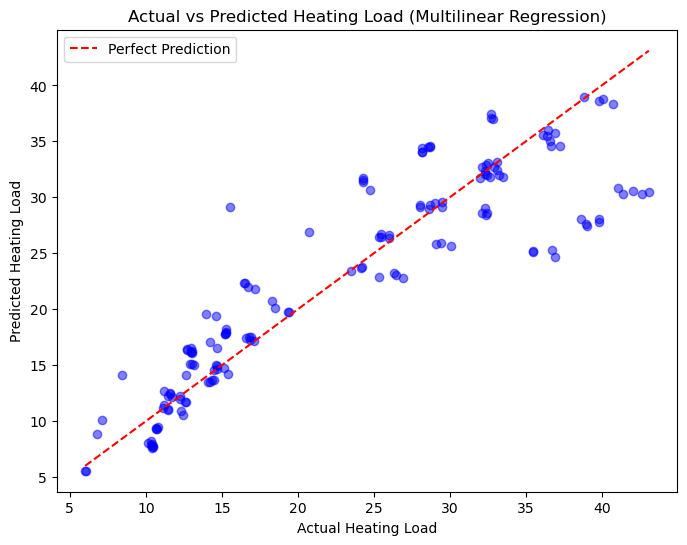

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load (Multilinear Regression)")
plt.legend()
plt.show()

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = LinearRegression()
model.fit(X_scaled, y_train)

coefficients = pd.Series(model.coef_, index=X_test.columns)
y_pred = model.predict(X_test)

abs_coeff = abs(coefficients)
sorted_abs_coeff = abs_coeff.sort_values()
print(coefficients)

Relative_Compactness         7.541445
Wall_Area                    6.084904
Orientation                 -0.119454
Glazing_Area                 2.591048
Glazing_Area_Distribution    0.303451
dtype: float64


Relative_Compactness
Improvement:
Compact the building design to reduce exterior surface area relative to its volume. This means designing the building to be more box-like or symmetrical rather than sprawling.
A more compact design minimizes the amount of exterior surface through which heat can escape, thus reducing the need for heating.

Wall_Area Improvements:Minimize exterior wall area in the building design. For example, instead of using a sprawling or irregular shape, focus on more compact or rectangular designs that reduce the amount of external wall space.

Glazing Area Improvements:Install double-glazed or triple-glazed windows to minimize heat transfer. Low-emissivity (Low-E) coatings on glass can also reduce heat loss in winter while allowing natural light
Place glazing strategically to maximize passive solar heating .
Reduce glazing in areas prone to significant heat loss .

Orientation:Design the building such that the longest facades face south in cold climates to maximize passive solar heating.
Avoid large windows on the north side, as they contribute to heat loss without providing much solar heat gain.